## Oversampling & Nyquist

[]

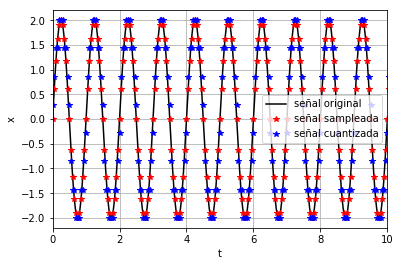

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = 2.0
f = 1.0 #reescalar NTF luego para que caiga dentro del rango
def signal(t):
	return A*np.sin(2*np.pi*f*t)

dt = .001 #diferencial, no importa el nro, cuanto mas chico mejor plot
tmax = 100
t = np.arange(0,tmax,dt) #tiempo continuo
s = signal(t)

#time-sampling...
dT = .05 #tiempo entre sampleos. Nyquist -> 1/(2*f)
T = np.arange(0,tmax,dT) #tiempos sampleados
S = signal(T)

#quantizing...
def q(B,x):
    # B: cantidad de bits, x: valor continuo en el rango [-A,A]
    Y = np.linspace(-A,A,2**B)
    return min(Y,key=lambda y:abs(y-x))

B = 3
Q = [q(B,h) for h in S]

R = 10 #rango de plot en t, menor que tmax
plt.plot(t,s,'k',label='señal original')
plt.plot(T,S,'r*',label='señal sampleada')
plt.plot(T,Q,'b*',label='señal cuantizada')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim([0,R])
plt.grid()
plt.legend()
plt.plot()

## FFT

50000 50000
1000 1000


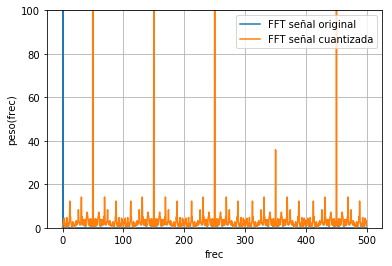

In [13]:
#Us=FFT(s)
U = np.fft.fft(s)
freq = np.fft.fftfreq(t.shape[-1],d=dt)
N = len(freq)
U = U[:N//2]
freqs = freq[:N//2] #frecuencias positivas
Us = np.sqrt(U.real**2+U.imag**2) #valores absolutos

print(len(Us),len(freqs))

#UQ=FFT(Q)
U = np.fft.fft(Q)
freq = np.fft.fftfreq(T.shape[-1],d=dt)#tengo la duda entre dt y dT...
N = len(freq)
U = U[:N//2]
freqQ = freq[:N//2] #frecuencias positivas
UQ = np.sqrt(U.real**2+U.imag**2) #valores absolutos

print(len(UQ),len(freqQ))

plt.plot(freqs, Us,label='FFT señal original')
plt.plot(freqQ, UQ,label='FFT señal cuantizada')
plt.grid()
plt.xlabel('frec')
plt.ylabel('peso(frec)')
plt.ylim([0,100])
plt.legend()